In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../dataset/heart_problem.csv')
df.head()

,Age,Gender,BMI,Smoker,Exercise_Frequency,Blood_Pressure,Cholesterol,Heart_Disease_Risk
0,63,Female,22.15,Yes,High,139.7,262.6,1
1,20,Female,25.01,Yes,High,128.5,219.9,0
2,46,Female,15.47,No,Low,112.0,288.2,0
3,52,Female,31.03,Yes,Low,146.8,153.4,1
4,56,Male,28.40,No,Low,105.6,161.8,0


# Encoding categorical data
- Gender: Female=0, Male=1
- Smoker: No=0, Yes=1
- Exercise_Frequency: Low=0, Medium=1, High=2

In [5]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [6]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Smoker'] = le.fit_transform(df['Smoker'])

In [7]:
oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Exercise_Frequency'] = oe.fit_transform(df[['Exercise_Frequency']])

In [8]:
df.head()

,Age,Gender,BMI,Smoker,Exercise_Frequency,Blood_Pressure,Cholesterol,Heart_Disease_Risk
0,63,0,22.15,1,2.0,139.7,262.6,1
1,20,0,25.01,1,2.0,128.5,219.9,0
2,46,0,15.47,0,0.0,112.0,288.2,0
3,52,0,31.03,1,0.0,146.8,153.4,1
4,56,1,28.40,0,0.0,105.6,161.8,0


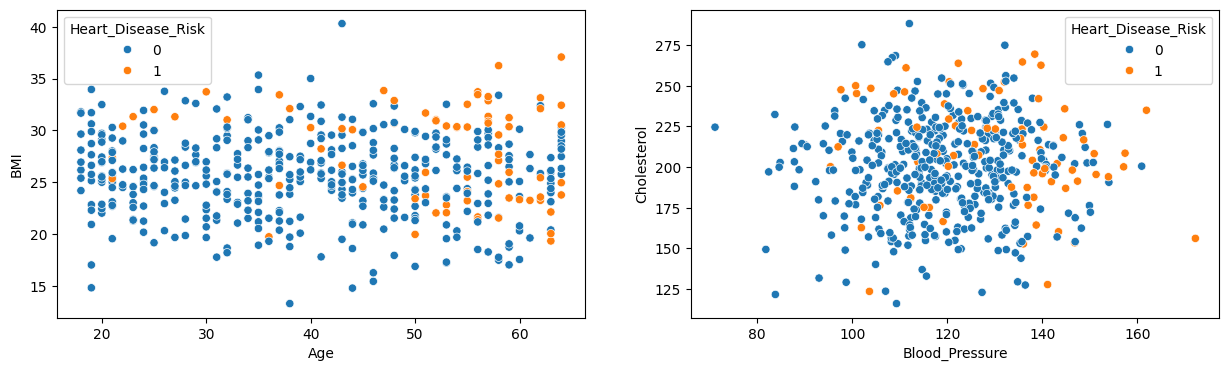

In [9]:
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='BMI', data=df, hue='Heart_Disease_Risk')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Blood_Pressure', y='Cholesterol', data=df, hue='Heart_Disease_Risk')

plt.show()

In [10]:
x = df.iloc[:, :-1]
y = df['Heart_Disease_Risk']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
lr.score(x_test, y_test)*100

89.60000000000001

In [16]:
lr.predict([[63, 0,	22.15,	1,	2.0, 139.7,	262.6]])

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [20]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [18]:
cf = confusion_matrix(y_test, lr.predict(x_test))

<Axes: >

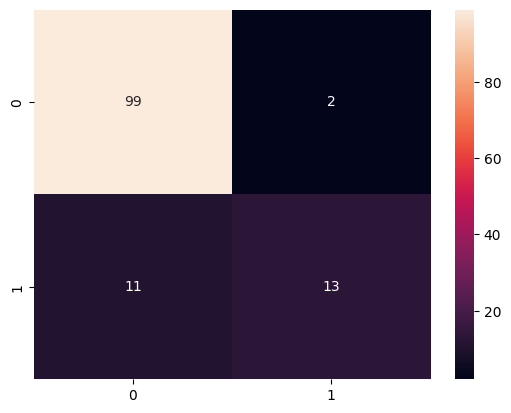

In [19]:
sns.heatmap(cf, annot=True)

In [22]:
precision_score(y_test, lr.predict(x_test)*100, average=None)

c:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


array([0.9, 0. , 0. ])